In [1]:
# imports
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os

2023-05-24 11:24:19.367363: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 11:24:19.495696: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 11:24:19.498833: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 11:24:21.762105: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# data paths
# Daten von: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
train_data_dir='data/train/'
validation_data_dir='data/test/'

# Trainings- und Testdatengenerator

In [3]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(48, 48),
					batch_size=32,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(48, 48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Beispiele

In [4]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [5]:
import matplotlib.pyplot as plt
import numpy as np

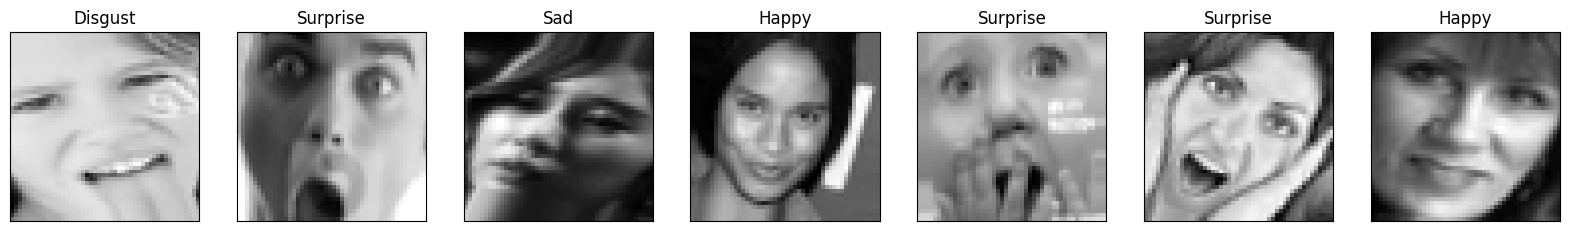

In [6]:
# plot train images
img, label = train_generator.__next__()

fig = plt.figure(figsize=(20, 20))
for i in range(7):
    ax = fig.add_subplot(1, 7, i+1, xticks=[], yticks=[])
    ax.imshow(img[i], cmap='gray')
    ax.set_title(class_labels[np.argmax(label[i])])

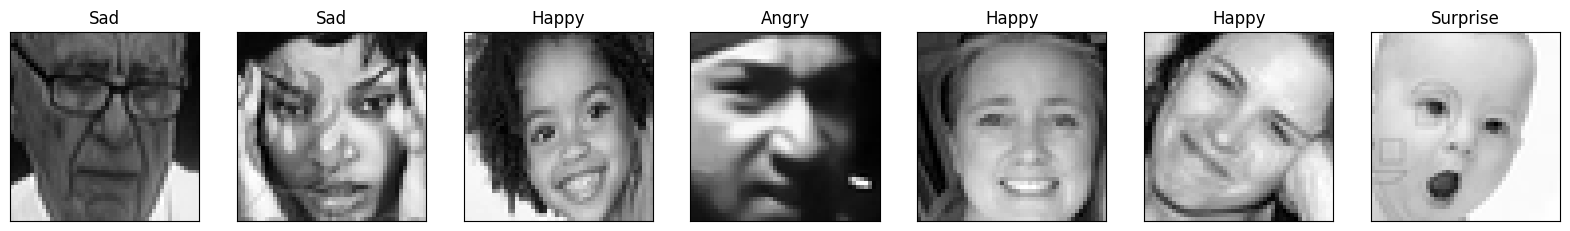

In [7]:
# plot test images
img, label = validation_generator.__next__()

fig = plt.figure(figsize=(20, 20))
for i in range(7):
    ax = fig.add_subplot(1, 7, i+1, xticks=[], yticks=[])
    ax.imshow(img[i], cmap='gray')
    ax.set_title(class_labels[np.argmax(label[i])])

# Modell bauen

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# ouput layer: 7 emotionen
model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

# Modell trainieren

In [9]:
# Zählen der Trainings- und Testbilder
num_train_imgs = 0
for root, dirs, files in os.walk(train_data_dir):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(validation_data_dir):
    num_test_imgs += len(files)

print(f"# Train Images: {num_train_imgs}")
print(f"# Test Images: {num_test_imgs}")

# Train Images: 28709
# Test Images: 7178


In [10]:
# Trainieren des Modells

# Anzahl der Epochen
epochs = 100

# Hiermit wurde es trainiert

# history = model.fit(
#     train_generator,
#     steps_per_epoch=num_train_imgs // 32, # anz. trainingsbilder pro epoche
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=num_test_imgs // 32 # anz. testbilder pro epoche
# )

In [ ]:
# Speichern des Modells
# model.save('models/model_file_.h5')

# Modellvalidierung

In [11]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
model = load_model('models/model_file.h5')

## Statische Daten

In [18]:
# Accuracy und Loss
loss, accuracy = model.evaluate(validation_generator)

print(f"Accuracy: {accuracy}")
print(f"Loss über 7 Klassen: {loss}")

2023-05-24 11:34:03.726640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


225/225 [==============================] - 27s 118ms/step - loss: 1.0261 - accuracy: 0.6375
Accuracy: 0.6375035047531128
Loss über 7 Klassen: 1.026077389717102


## Confusion Matrix

  1/225 [..............................] - ETA: 37s

2023-05-24 11:30:06.838043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


225/225 [==============================] - 14s 62ms/step


Text(0.5, 1.0, 'Confusion Matrix')

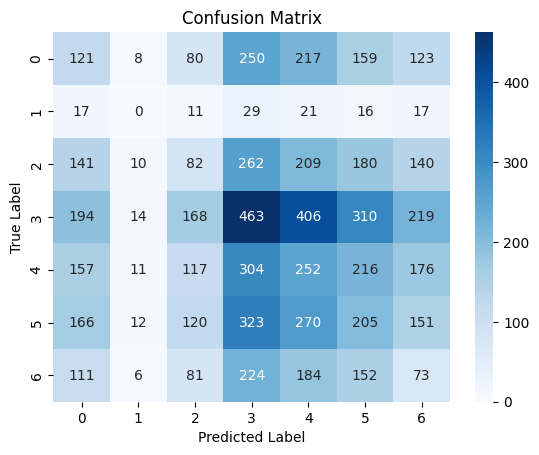

In [17]:
# Predictions
Y_pred = model.predict(validation_generator, num_test_imgs // 32+1)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')